### Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [45]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [50]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col = 'Timestamp',
    parse_dates =True, 
    infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [51]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [52]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True)


In [53]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [54]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [55]:
# Check to make sure the "$" is removed from the Close column
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 2: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [56]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna(inplace=True)

# Check to make sure that NaN values are removed.
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 3: Convert the data type of the Close column to a `float`.

In [57]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype('float')

#Check type using dtypes
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [60]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()

# Confirm there is no duplicated data 
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [61]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$", "")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase.dropna(inplace=True)

# Check to make sure that NaN values are removed.
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [63]:
# Convert the Close data type to a float
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype('float')

#Check type using dtypes
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [65]:
# Review the data for duplicate values, and drop them if necessary
coinbase = coinbase.drop_duplicates()

# Confirm there is no duplicated data 
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [67]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [68]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [69]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [70]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

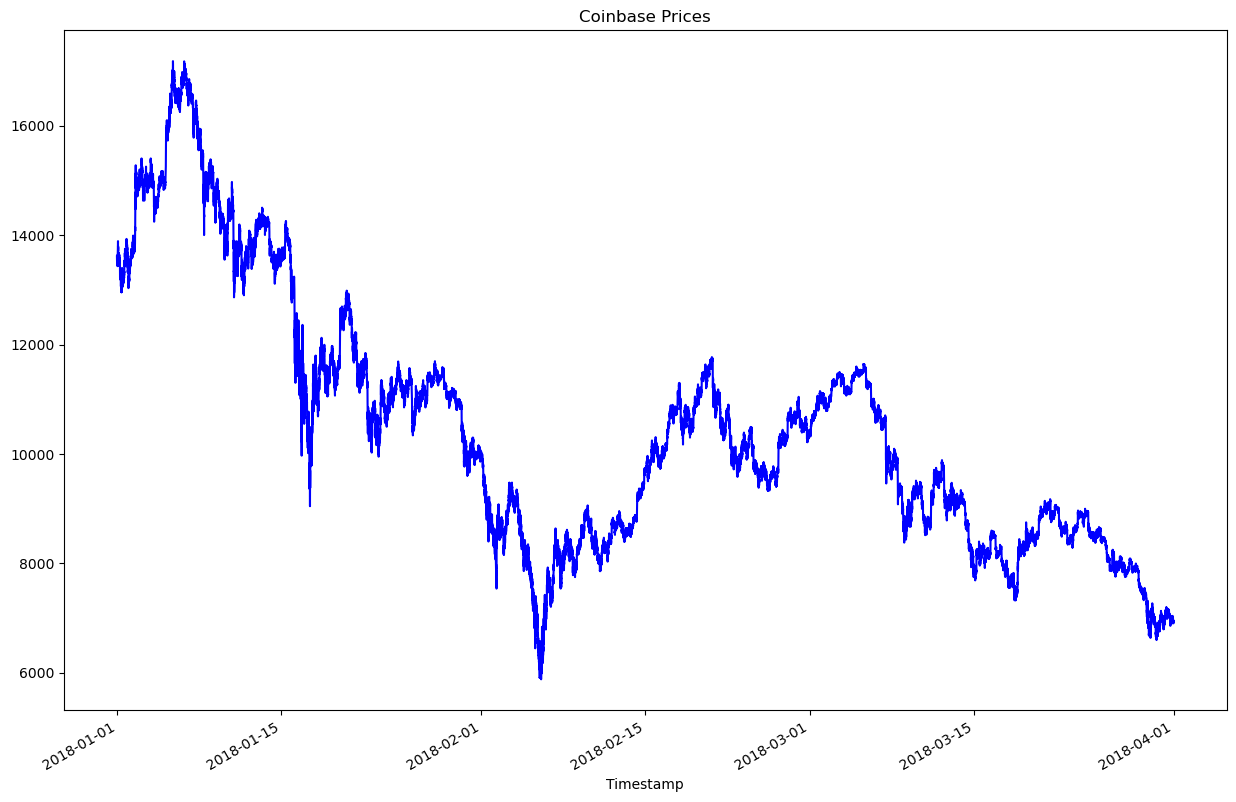

In [71]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(
    figsize=(15,10),
    title='Coinbase Prices',
    color = 'blue'
)

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

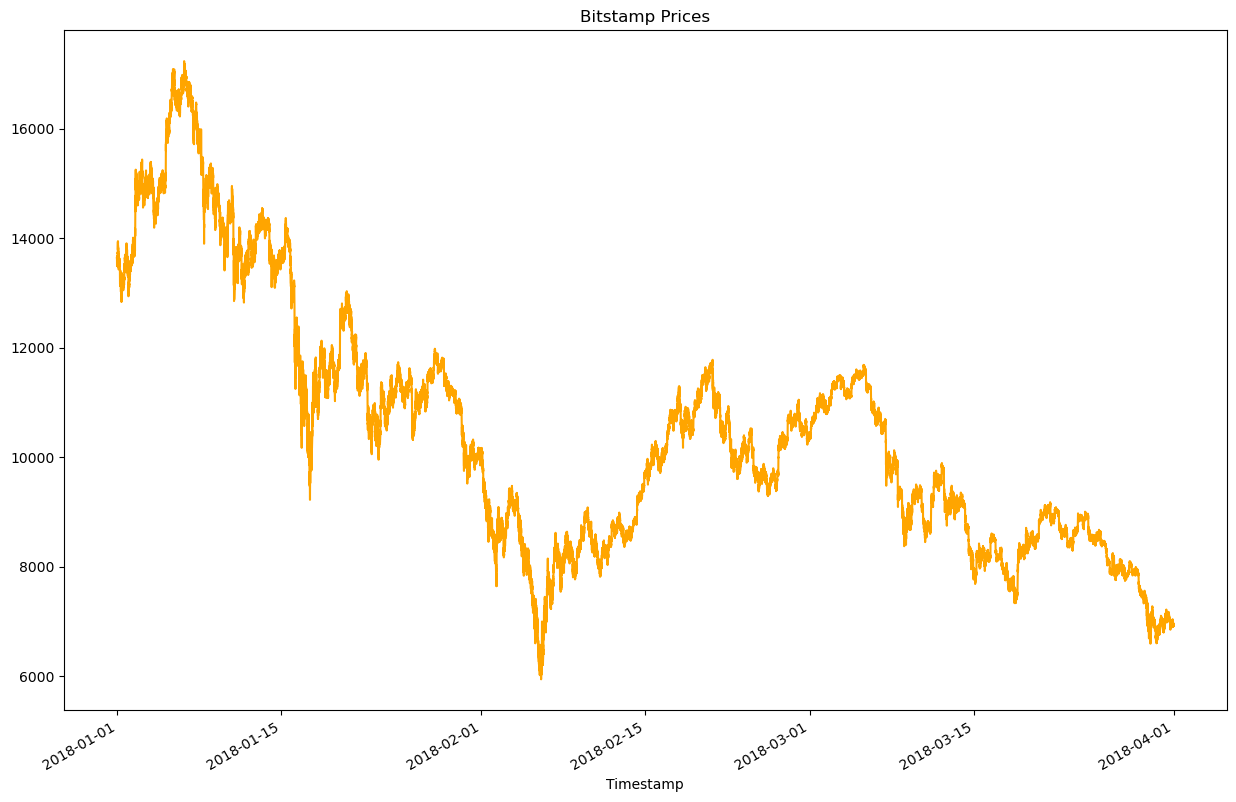

In [72]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(
    figsize=(15,10),
    title = "Bitstamp Prices",
    color = 'orange'
)

<AxesSubplot:title={'center':'Coinbase vs Bitstamp'}, xlabel='Timestamp'>

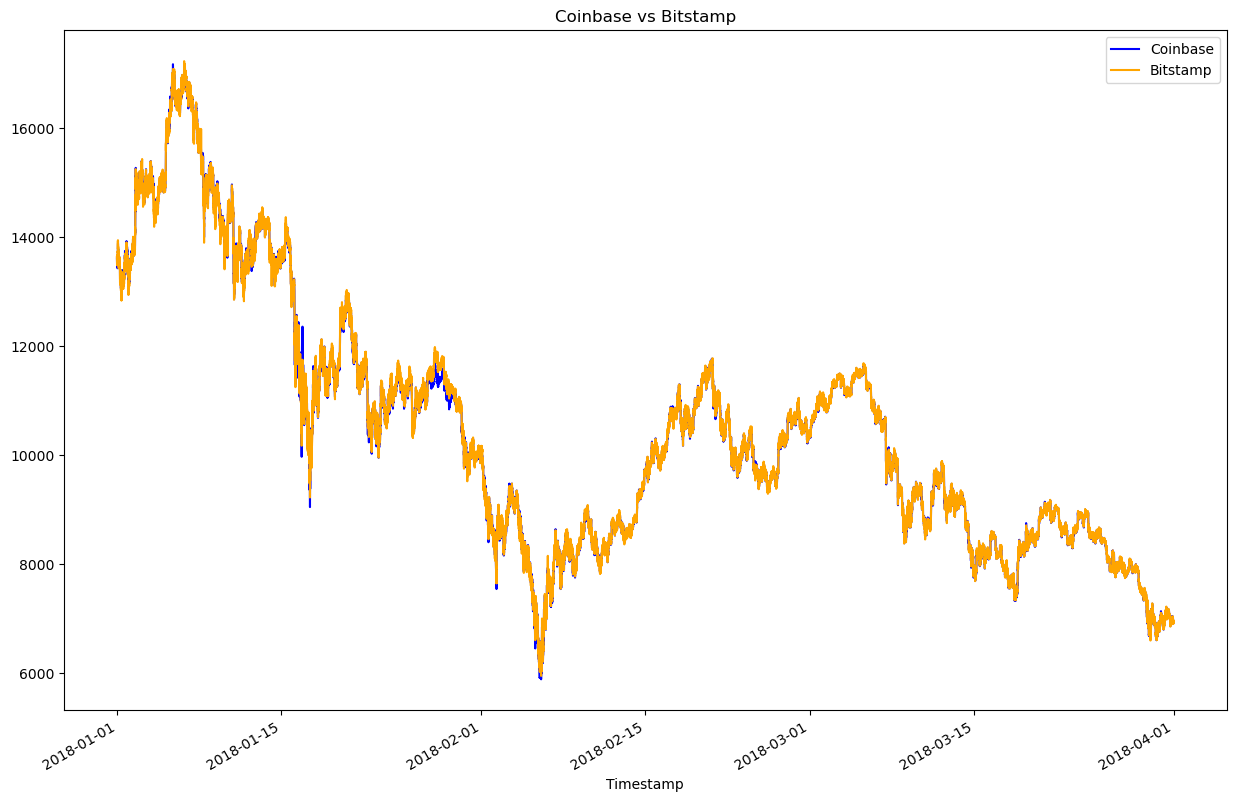

In [73]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase_sliced.plot(
    legend = True, 
    figsize=(15,10),
    title = "Coinbase vs Bitstamp", 
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.plot(
    legend = True, 
    figsize=(15,10),
    color="orange",
    label="Bitstamp"
)

    

<AxesSubplot:title={'center':'Exchange Comparison (01/01/2018 - 02/01/2018)'}, xlabel='Timestamp'>

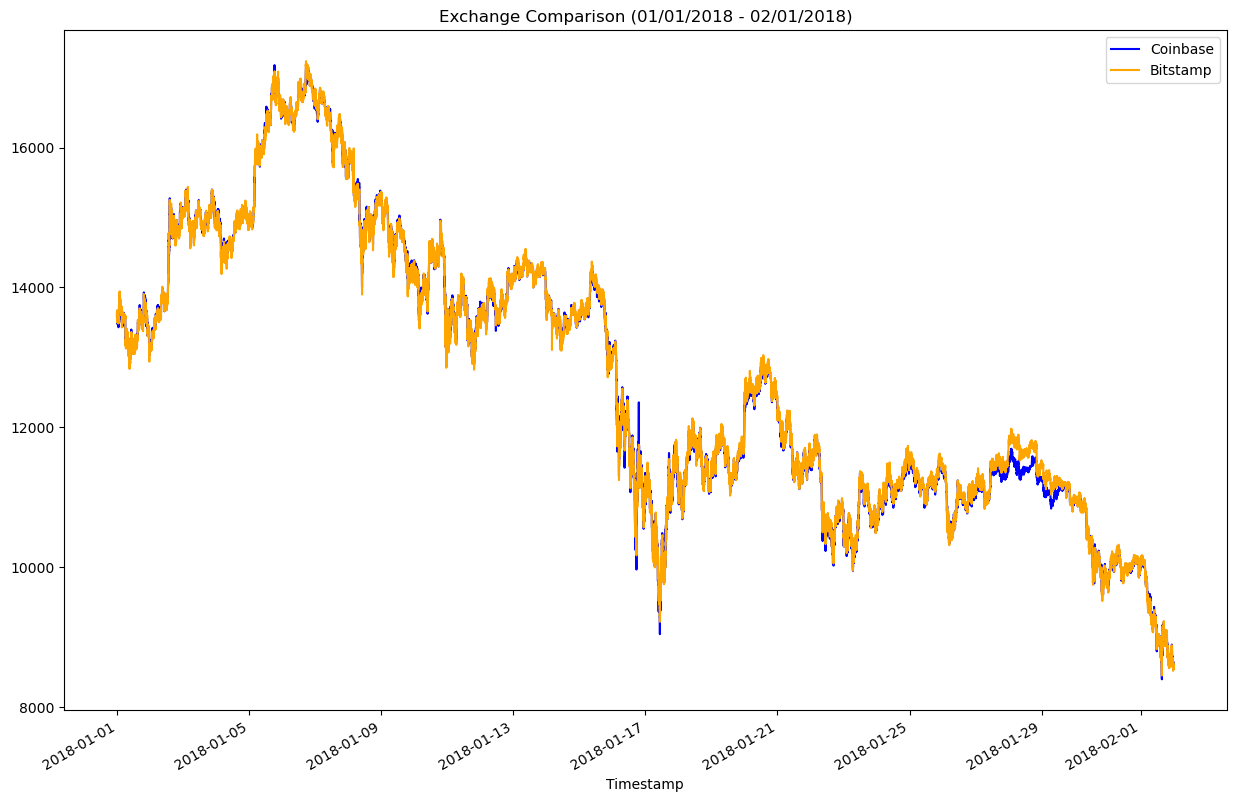

In [74]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(
    legend = True, 
    title = "Exchange Comparison (01/01/2018 - 02/01/2018)",
    figsize=(15,10),
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(
    legend = True, 
    figsize=(15,10),
    color = "orange",
    label = "Bitstamp"
)

<AxesSubplot:title={'center':'Exchange Comparison (02/01/2018 - 03/01/2018)'}, xlabel='Timestamp'>

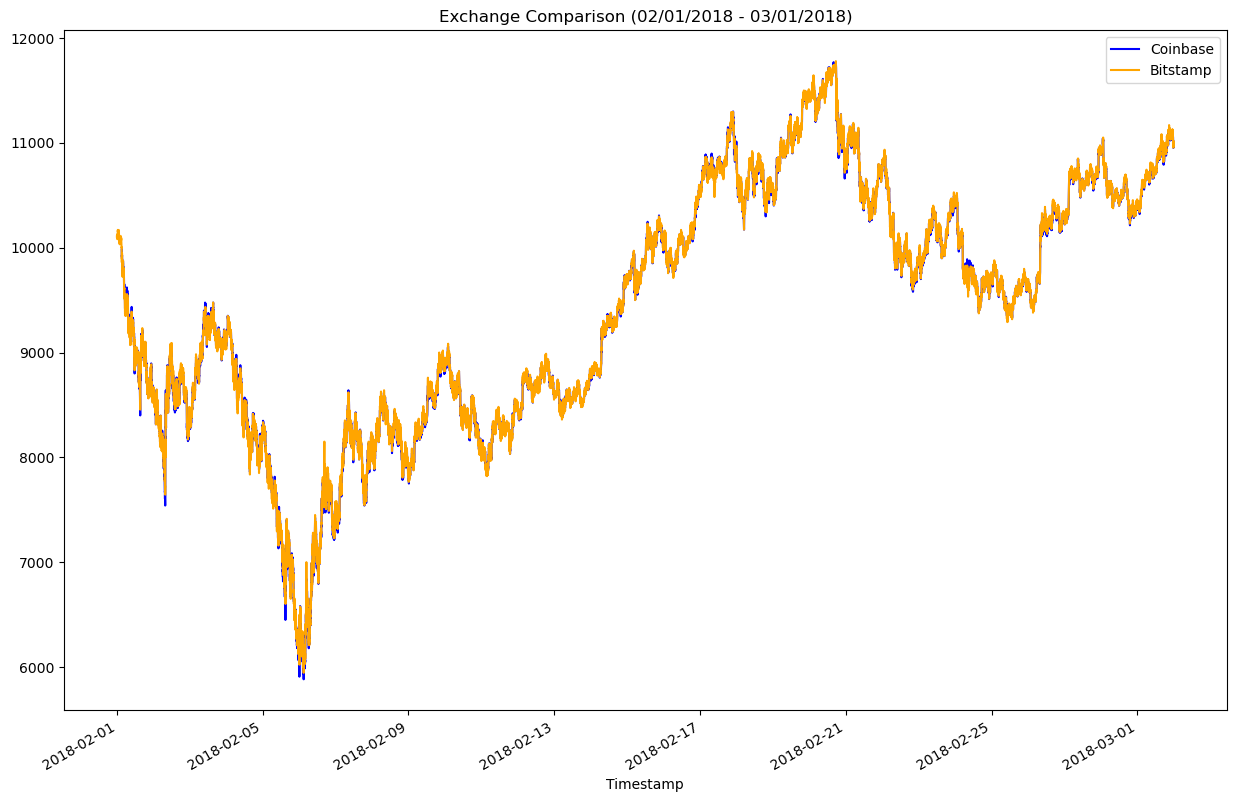

In [273]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
coinbase_sliced.loc['2018-02-01':'2018-03-01'].plot(
    legend = True, 
    title = "Exchange Comparison (02/01/2018 - 03/01/2018)",
    figsize=(15,10),
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.loc['2018-02-01':'2018-03-01'].plot(
    legend = True, 
    figsize=(15,10),
    color = "orange",
    label = "Bitstamp"
)

<AxesSubplot:title={'center':'Exchange Comparison (03/01/2018 - 04/01/2018)'}, xlabel='Timestamp'>

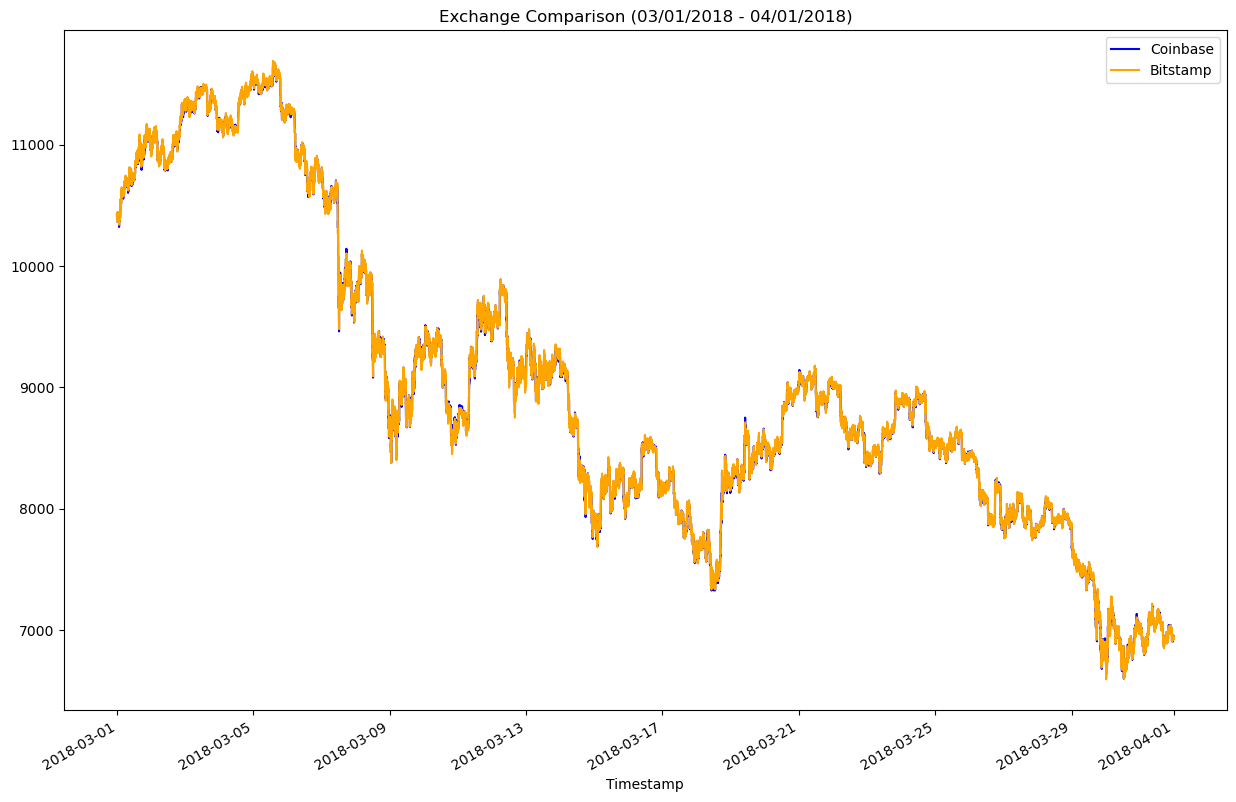

In [75]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot(
    legend = True, 
    title = "Exchange Comparison (03/01/2018 - 04/01/2018)",
    figsize=(15,10),
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot(
    legend = True, 
    figsize=(15,10),
    color = "orange",
    label = "Bitstamp"
)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It seems that overall there is a tight and consistent spread between coinbase and bitstamp. Zooming into specific one month time periods (i.e., early, mid, and late as shown above, it does become more clear that at brief moments in time the spread becomes wider between the two exchanges. For an example, January 28-29 2018 shows a clear wider spread.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':"Exchange Comparison ('2018-01-16')"}, xlabel='Timestamp'>

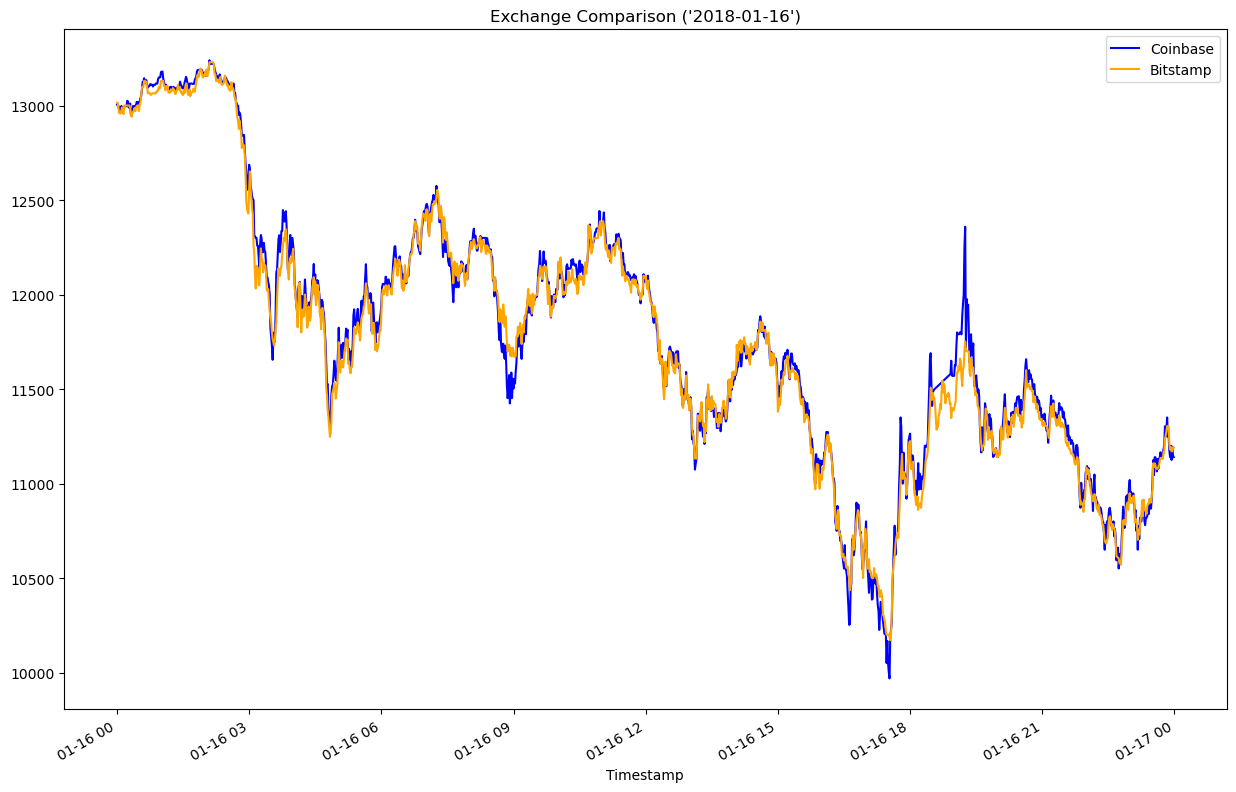

In [181]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced.loc['2018-01-16'].plot(
    legend = True, 
    title = "Exchange Comparison ('2018-01-16')",
    figsize=(15,10),
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.loc['2018-01-16'].plot(
    legend = True, 
    figsize=(15,10),
    color = "orange",
    label = "Bitstamp"
)

In [145]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-16'] - bitstamp_sliced.loc['2018-01-16']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:>

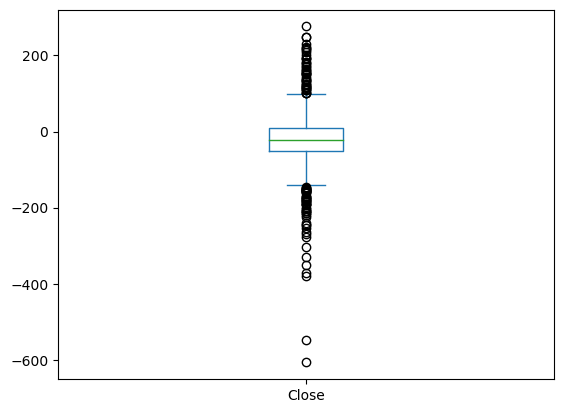

In [116]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':"Exchange Comparison ('2018-02-05')"}, xlabel='Timestamp'>

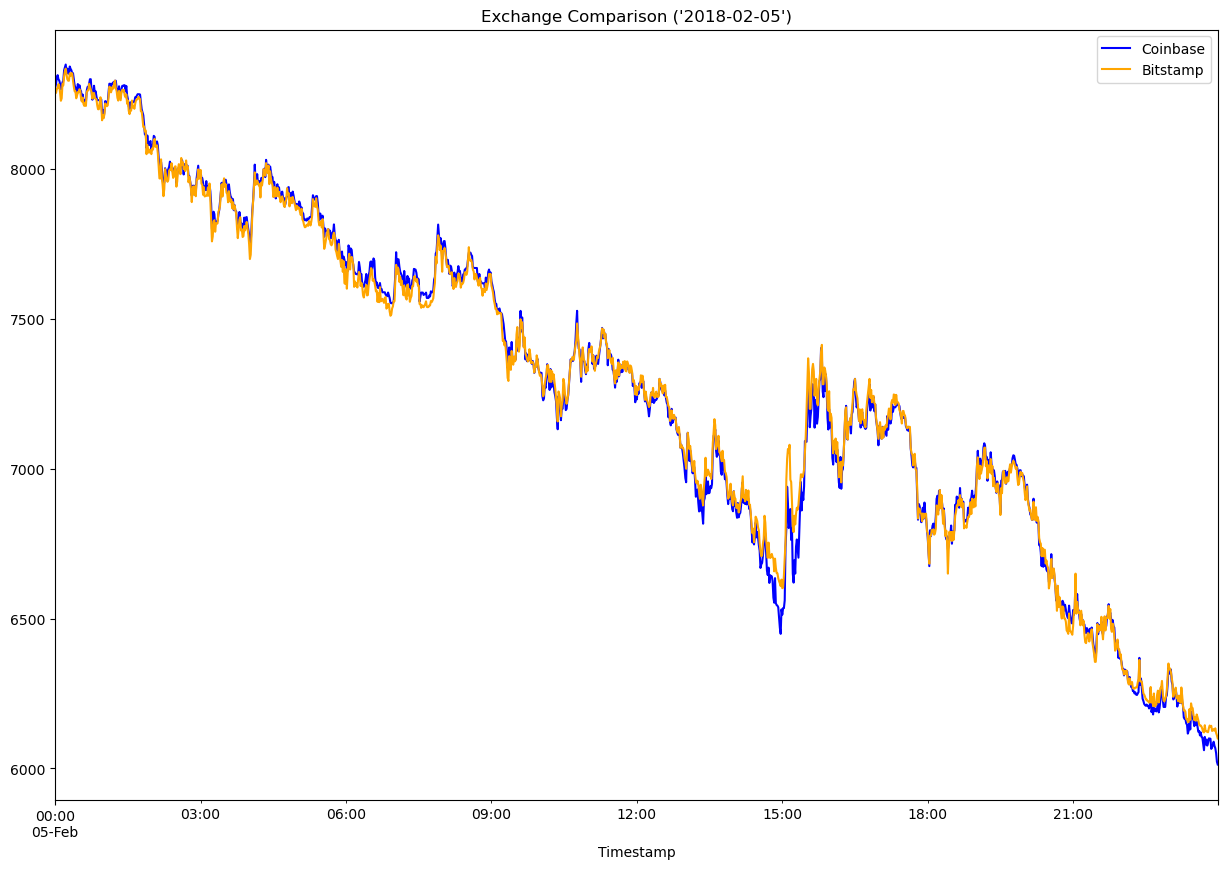

In [279]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced.loc['2018-02-05'].plot(
    legend = True, 
    title = "Exchange Comparison ('2018-02-05')",
    figsize=(15,10),
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.loc['2018-02-05'].plot(
    legend = True, 
    figsize=(15,10),
    color = "orange",
    label = "Bitstamp"
)

In [280]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-05'] - bitstamp_sliced.loc['2018-02-05']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -1.253743
std        33.429441
min      -254.000000
25%       -15.012500
50%         3.470000
75%        19.562500
max        80.990000
Name: Close, dtype: float64

<AxesSubplot:>

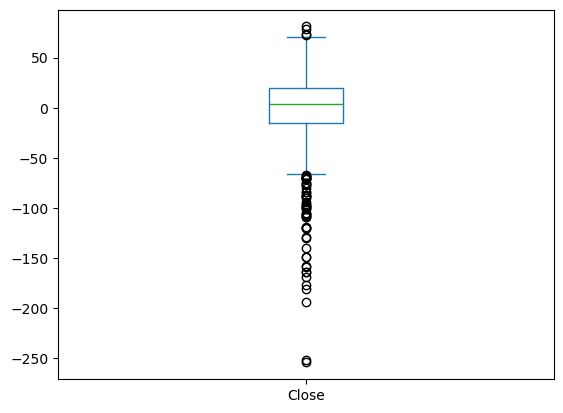

In [281]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':"Exchange Comparison ('2018-03-14')"}, xlabel='Timestamp'>

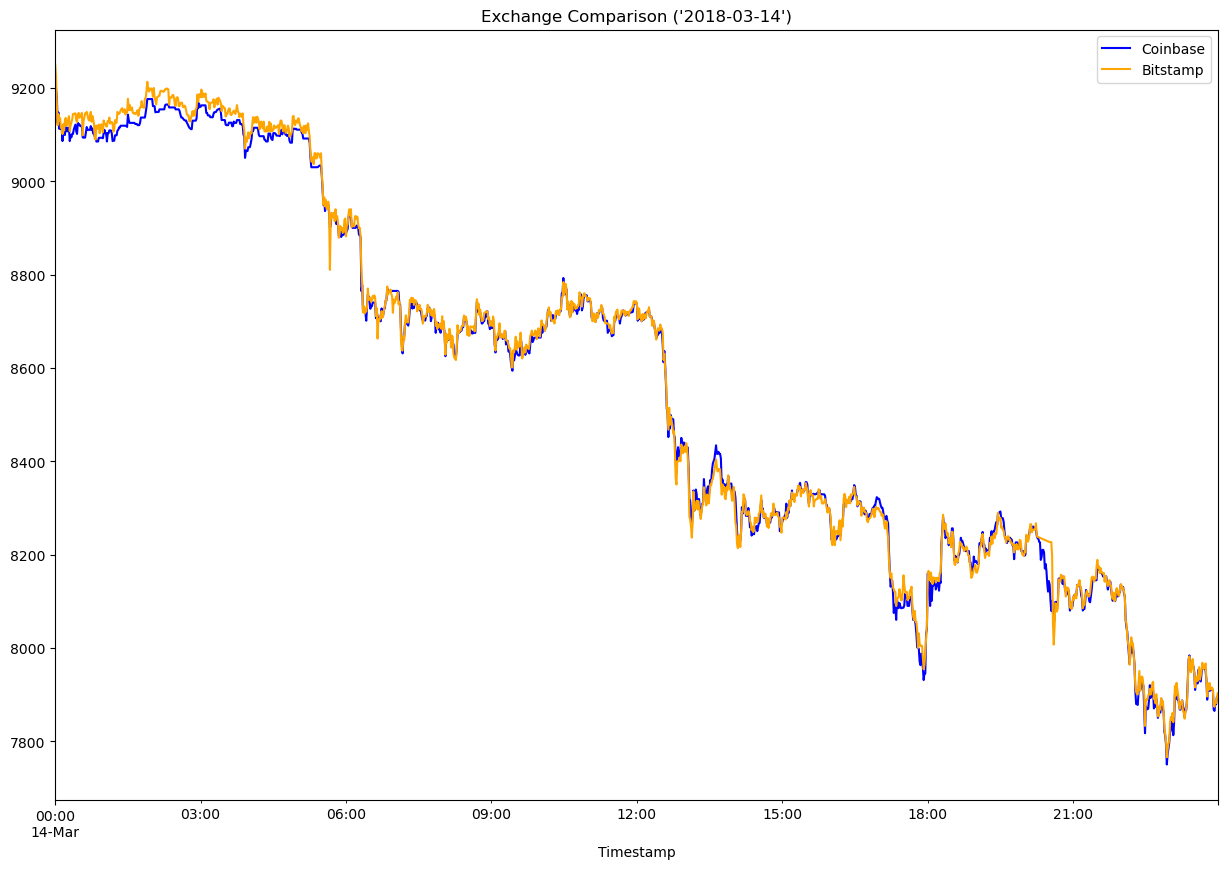

In [298]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced.loc['2018-03-14'].plot(
    legend = True, 
    title = "Exchange Comparison ('2018-03-14')",
    figsize=(15,10),
    color = "blue",
    label = "Coinbase"
)
bitstamp_sliced.loc['2018-03-14'].plot(
    legend = True, 
    figsize=(15,10),
    color = "orange",
    label = "Bitstamp"
)

In [299]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-03-14'] - bitstamp_sliced.loc['2018-03-14']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1425.000000
mean       -6.731404
std        16.322187
min      -147.650000
25%       -16.600000
50%        -6.000000
75%         2.910000
max        90.010000
Name: Close, dtype: float64

<AxesSubplot:>

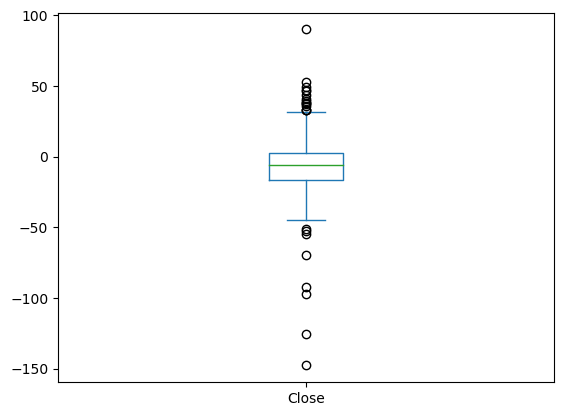

In [300]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [190]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges 
# by subtracting the lower-priced exchange from the higher-priced one
if coinbase_sliced.loc['2018-01-16'].iloc[-1] > bitstamp_sliced.loc['2018-01-16'].iloc[-1]:
    arbitrage_spread_early = coinbase_sliced.loc['2018-01-16'] - bitstamp_sliced.loc['2018-01-16']
    print("The higher closing price is coinbase")
elif coinbase_sliced.loc['2018-01-16'].iloc[-1] < bitstamp_sliced.loc['2018-01-16'].iloc[-1]:
    arbitrage_spread_early = bitstamp_sliced.loc['2018-01-16'] - coinbase_sliced.loc['2018-01-16']
    print("The higher closing price is bitstamp") 
else:
    print("The closing prices on the exhanges are the same")

The higher closing price is bitstamp


In [191]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arb_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
arb_spread_early.describe()

count    451.000000
mean      40.645477
std       47.387457
min        0.010000
25%       10.010000
50%       26.830000
75%       49.330000
max      275.920000
Name: Close, dtype: float64

In [285]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges 
# by subtracting the lower-priced exchange from the higher-priced one
if coinbase_sliced.loc['2018-02-05'].iloc[-1] > bitstamp_sliced.loc['2018-02-05'].iloc[-1]:
    arbitrage_spread_middle = coinbase_sliced.loc['2018-02-05'] - bitstamp_sliced.loc['2018-02-05']
    print("The higher closing price is coinbase")
elif coinbase_sliced.loc['2018-02-05'].iloc[-1] < bitstamp_sliced.loc['2018-02-05'].iloc[-1]:
    arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-05'] - coinbase_sliced.loc['2018-02-05']
    print("The higher closing price is bitstamp") 
else:
    print("The closing prices on the exhanges are the same")

The higher closing price is bitstamp


In [288]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arb_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arb_spread_middle.describe()

count    625.000000
mean      28.017920
std       32.654268
min        0.010000
25%        8.000000
50%       18.470000
75%       33.850000
max      254.000000
Name: Close, dtype: float64

In [301]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges 
# by subtracting the lower-priced exchange from the higher-priced one
if coinbase_sliced.loc['2018-03-14'].iloc[-1] > bitstamp_sliced.loc['2018-03-14'].iloc[-1]:
    arbitrage_spread_late = coinbase_sliced.loc['2018-03-14'] - bitstamp_sliced.loc['2018-03-14']
    print("The higher closing price is coinbase")
elif coinbase_sliced.loc['2018-03-14'].iloc[-1] < bitstamp_sliced.loc['2018-03-14'].iloc[-1]:
    arbitrage_spread_late = bitstamp_sliced.loc['2018-03-14'] - coinbase_sliced.loc['2018-03-14']
    print("The higher closing price is bitstamp") 
else:
    print("The closing prices on the exhanges are the same")

The higher closing price is bitstamp


In [302]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arb_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
arb_spread_late.describe()

count    956.000000
mean      14.774121
std       12.422690
min        0.010000
25%        5.912500
50%       11.935000
75%       21.350000
max      147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [303]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arb_spread_early / coinbase_sliced.loc['2018-01-16']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-16 00:00:00    0.000694
2018-01-16 00:01:00    0.000640
2018-01-16 00:02:00         NaN
2018-01-16 00:03:00         NaN
2018-01-16 00:04:00         NaN
                         ...   
2018-01-16 23:55:00         NaN
2018-01-16 23:56:00    0.004115
2018-01-16 23:57:00         NaN
2018-01-16 23:58:00    0.004049
2018-01-16 23:59:00    0.004565
Name: Close, Length: 1419, dtype: float64

In [291]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arb_spread_middle / coinbase_sliced.loc['2018-02-05']

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-05 00:00:00   NaN
2018-02-05 00:01:00   NaN
2018-02-05 00:02:00   NaN
2018-02-05 00:03:00   NaN
2018-02-05 00:04:00   NaN
Name: Close, dtype: float64

In [304]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arb_spread_late / coinbase_sliced.loc['2018-03-14']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [293]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 07:39:00    0.010341
2018-01-16 08:43:00    0.013533
2018-01-16 08:44:00    0.013085
2018-01-16 08:45:00    0.013013
2018-01-16 08:46:00    0.017702
Name: Close, dtype: float64

In [294]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-05 13:29:00    0.010345
2018-02-05 14:41:00    0.010523
2018-02-05 14:43:00    0.012529
2018-02-05 14:44:00    0.014504
2018-02-05 14:47:00    0.011269
Name: Close, dtype: float64

In [305]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [306]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    36.000000
mean      0.015715
std       0.003830
min       0.010341
25%       0.012960
50%       0.014925
75%       0.018038
max       0.024152
Name: Close, dtype: float64

In [307]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    51.000000
mean      0.017361
std       0.006357
min       0.010345
25%       0.012969
50%       0.015202
75%       0.020520
max       0.037211
Name: Close, dtype: float64

In [308]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [257]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-16 07:39:00    124.56
2018-01-16 08:43:00    158.91
2018-01-16 08:44:00    153.10
2018-01-16 08:45:00    152.18
2018-01-16 08:46:00    207.82
Name: Close, dtype: float64

In [309]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-05']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-05 13:29:00    71.57
2018-02-05 14:41:00    70.08
2018-02-05 14:43:00    83.57
2018-02-05 14:44:00    96.00
2018-02-05 14:47:00    74.84
Name: Close, dtype: float64

In [310]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [311]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     36.000000
mean     174.062222
std       41.263561
min      110.000000
25%      141.455000
50%      167.005000
75%      201.947500
max      275.920000
Name: Close, dtype: float64

In [312]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count     51.000000
mean     115.987255
std       43.216256
min       66.440000
25%       87.615000
50%      104.650000
75%      134.715000
max      254.000000
Name: Close, dtype: float64

In [313]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade 01/16/2018)'}, xlabel='Timestamp'>

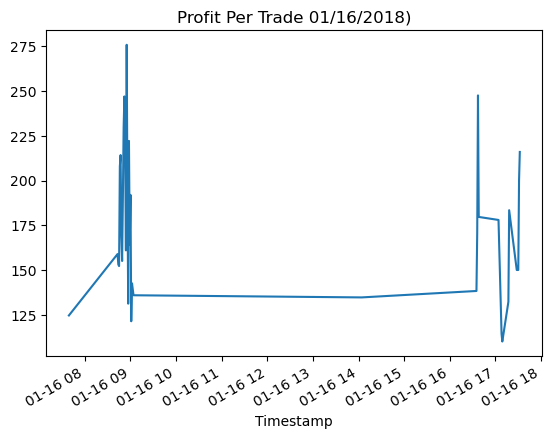

In [314]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(
    title = "Profit Per Trade 01/16/2018)")

<AxesSubplot:title={'center':'Profit Per Trade 02/05/2018)'}, xlabel='Timestamp'>

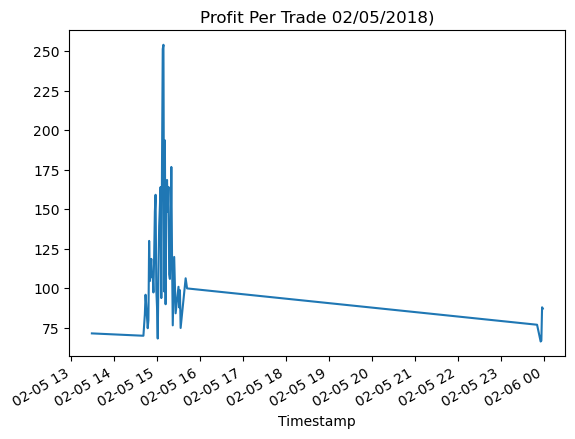

In [315]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(
    title = "Profit Per Trade 02/05/2018)")

<AxesSubplot:title={'center':'Profit Per Trade 03/14/2018)'}, xlabel='Timestamp'>

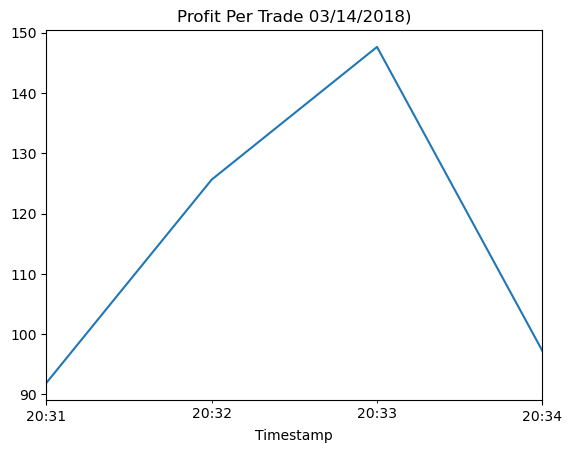

In [316]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(
    title = "Profit Per Trade 03/14/2018)")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [317]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

6266.24

In [318]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()

5915.350000000004

In [319]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()

462.3899999999976

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [320]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - 01/16/2018'}, xlabel='Timestamp'>

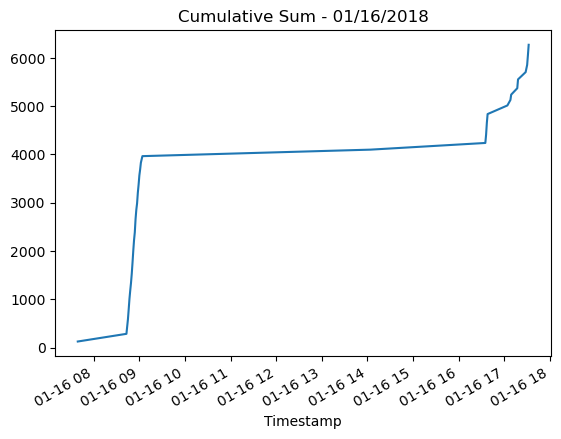

In [321]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(
    title="Cumulative Sum - 01/16/2018")

In [322]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - 02/05/2018'}, xlabel='Timestamp'>

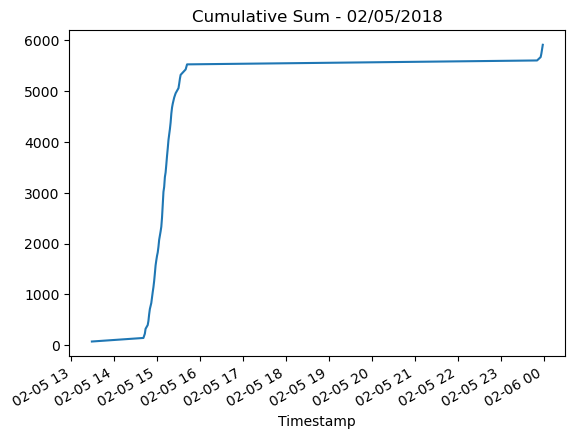

In [327]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(
    title="Cumulative Sum - 02/05/2018")

In [325]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - 03/14/2018'}, xlabel='Timestamp'>

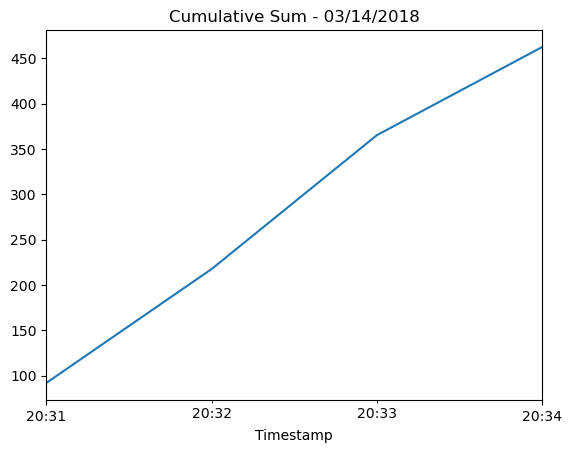

In [326]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(
    title="Cumulative Sum - 03/14/2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The early and middle periods both have a similar profit chart which shows sporadic moments of profit followed by an extended period of no trades being taken. The late period shows a scenerio of consistent profit in a linear type graph shown above.